<a href="https://colab.research.google.com/github/Souravkumar2434/Machine_learning/blob/main/kmeans_from_scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.datasets import make_blobs
import numpy as np
import matplotlib.pyplot as plt

In [2]:
centroids = [(-5, -5), (5, 5)]
cluster_std = [1, 1]

X, y = make_blobs(n_samples = 100, n_features = 2, cluster_std = cluster_std, centers = centroids, random_state = 22)

In [3]:
X.shape

(100, 2)

In [4]:
X[:5]

array([[-5.64607361, -4.662675  ],
       [-4.40507155, -5.63890807],
       [ 4.04052621,  5.32001965],
       [-6.37605696, -5.27155468],
       [-6.17940257, -5.54529895]])

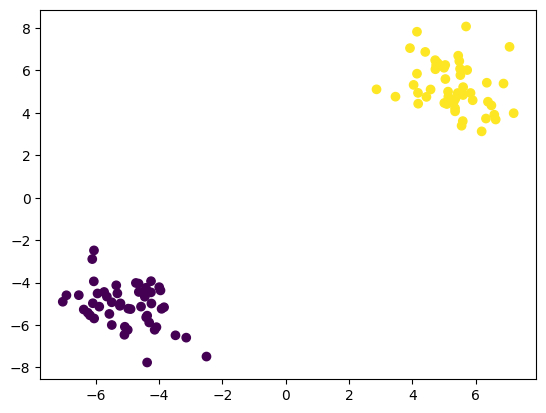

In [5]:
plt.scatter(X[:,0], X[:,1],c = y)

In [24]:
class KMeans:
  def __init__(self, n_clusters = 2, max_iter = 100):
    self.n_clusters = n_clusters
    self.max_iter = max_iter
    self.centroids = None

  def fit_predict(self, X):
    self.centroids = np.random.sample((self.n_clusters, X.shape[1]))
    for i in range(self.max_iter):
      cluster_group = self._assign_cluster(X)
      old_centroids = self.centroids
      print(f"old_centroids: {old_centroids}")
      self.centroids = self._move_centroids(X, cluster_group)
      print(f"new_centroids: {self.centroids}")
      if np.all(old_centroids == self.centroids):
        break
    return cluster_group


  def _assign_cluster(self, X):
    cluster_group = []
    distances = []

    for row in X:
      for centroid in self.centroids:
        distances.append(np.sqrt(np.dot(row - centroid, row - centroid)))
      minimum = min(distances)
      idx = distances.index(minimum)
      cluster_group.append(idx)
      distances.clear()
    return np.array(cluster_group)

  def _move_centroids(self, X, cluster_group):
    new_centroids = []
    cluster_type = np.unique(cluster_group)

    for i in cluster_type:
      new_centroids.append(X[cluster_group == i].mean(axis = 0))
    return np.array(new_centroids)


In [28]:
kmeans = KMeans(n_clusters = 2)
y_means = kmeans.fit_predict(X)

old_centroids: [[0.77722336 0.2253956 ]
 [0.68639479 0.75762709]]
new_centroids: [[-5.01412831 -5.09322249]
 [ 5.28225592  5.26973181]]
old_centroids: [[-5.01412831 -5.09322249]
 [ 5.28225592  5.26973181]]
new_centroids: [[-5.01412831 -5.09322249]
 [ 5.28225592  5.26973181]]


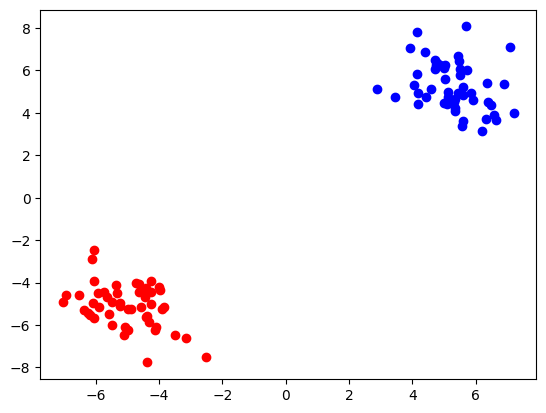

In [31]:
plt.scatter(X[y_means == 0,0], X[y_means == 0,1], color = 'r')
plt.scatter(X[y_means == 1,0], X[y_means == 1,1], color = 'b')